In [2]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("C:\\Users\\renug\\Downloads\\Complete-Deep-Learning-master\\Complete-Deep-Learning-master\\ANN\\Churn_Modelling.csv")

#we didvidede the data set into dependant and independant features
#'RowNumber', 'CustomerId', 'Surname'
#the information from this column is not useful for ours. so we can avoid using them

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]



In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [10]:
#Create dummy variables
#geography and gender are categorical variables. so we are creating dummies for it.
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)



In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [13]:
#do we need feature scaling in DL? Yes, since input gets multiplies with weight and how much time it takes to do the operation. so we scale all features within same range so that the multiplication operation becomes easy and takes less time. resulting in convergence happens quickly. 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [17]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential #responsible for creating the neural structure
from keras.layers import Dense #for creating hidden layesr, dense is used
from keras.layers import LeakyReLU,PReLU,ELU #different types of activation functions
from keras.layers import Dropout #regularization technique which is used when the NN is very dense




In [23]:
print(keras.__version__)

3.2.1


In [29]:
# Initialising the ANN, initially it will be empty NN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))




In [28]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))


In [30]:
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))



In [31]:
classifier.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [35]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs = 100)



Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4669 - loss: 0.7726 - val_accuracy: 0.6816 - val_loss: 0.6009
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7395 - loss: 0.5737 - val_accuracy: 0.7891 - val_loss: 0.5241
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.5225 - val_accuracy: 0.8042 - val_loss: 0.4880
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8154 - loss: 0.4783 - val_accuracy: 0.8080 - val_loss: 0.4667
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8108 - loss: 0.4696 - val_accuracy: 0.8114 - val_loss: 0.4515
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8158 - loss: 0.4669 - val_accuracy: 0.8133 - val_loss: 0.4409
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8226 - loss: 0.4395 - val_accuracy: 0.8175 - val_loss: 0.4325
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8129 - loss: 0.4332 - val_accu

536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.3295 - val_accuracy: 0.8501 - val_loss: 0.3599
Epoch 52/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3251 - val_accuracy: 0.8493 - val_loss: 0.3596
Epoch 53/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 0.3388 - val_accuracy: 0.8504 - val_loss: 0.3596
Epoch 54/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8669 - loss: 0.3394 - val_accuracy: 0.8504 - val_loss: 0.3595
Epoch 55/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8594 - loss: 0.3457 - val_accuracy: 0.8501 - val_loss: 0.3592
Epoch 56/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.3259 - val_accuracy: 0.8512 - val_loss: 0.3591
Epoch 57/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.3465 - val_accuracy: 0.8508 - val_loss: 0.3591
Epoch 58/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8634 - loss: 0.3423 - val_accuracy:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


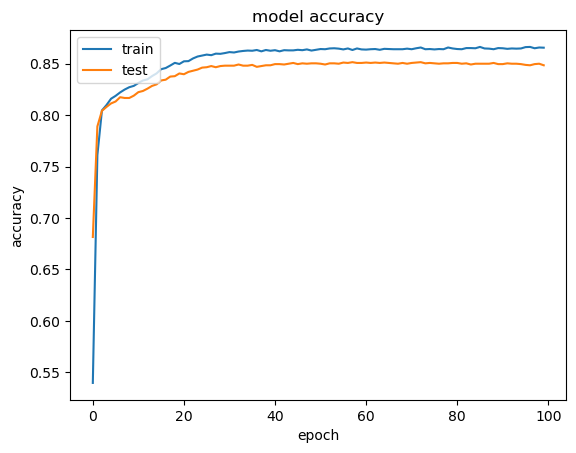

In [41]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






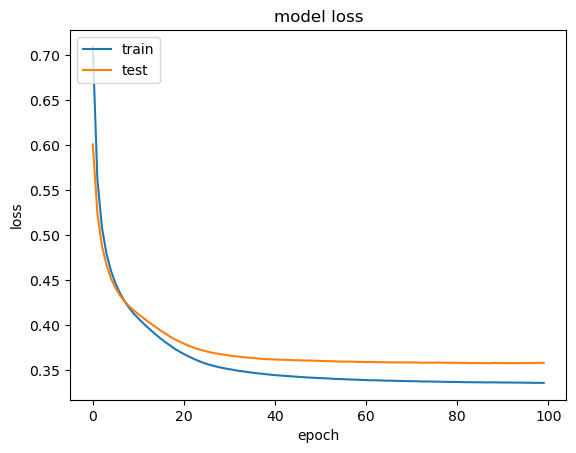

In [40]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)




63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [38]:
score

0.8605